## Importação dos dados

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Importação do dataset Diabetes

In [2]:
diabetes = pd.read_csv('./SRC/diabetes.tab.txt', sep="	")
diabetes = diabetes.reindex()

Renomeando as colunas

In [3]:
diabetes.columns = ['IDADE', 'SEXO', 'IMC', 'PRESSAO_ARTERIAL', 'COLESTEROL_TOTAL', 'LDL', 'HDL','TCH','LTG','ACUCAR_SANGUE','Y']

### Plotando em 2d

<AxesSubplot:xlabel='IMC', ylabel='ACUCAR_SANGUE'>

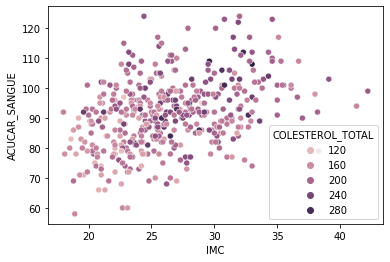

In [4]:
sb.scatterplot(data=diabetes, x='IMC', y='ACUCAR_SANGUE', hue='COLESTEROL_TOTAL')

## Análise do dataset Diabetes

Criando um describe do dataset

In [5]:
describe = diabetes.describe(percentiles=[])
describe = describe.drop(index='count')
describe = describe.rename(index={'50%':'Mediana', 'std':'DesvioPadrao','mean':'Media'})
describe

,IDADE,SEXO,IMC,PRESSAO_ARTERIAL,COLESTEROL_TOTAL,LDL,HDL,TCH,LTG,ACUCAR_SANGUE,Y
Media,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
DesvioPadrao,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
Mediana,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


### Removendo outliers

Fica bastante simples calcular os outlieres utilizando a função zscore da biblioteca scipy. O código abaixo irá criar uma lista com todos os itens que tem zscore menor que 3. Depois eu faço um describe para informar as métricas.

In [6]:
from scipy import stats
describe_no_outliers = diabetes[(np.abs(stats.zscore(diabetes)) < 3).all(axis=1)].describe(percentiles=[])
describe_no_outliers = describe_no_outliers.drop(index='count')
describe_no_outliers

,IDADE,SEXO,IMC,PRESSAO_ARTERIAL,COLESTEROL_TOTAL,LDL,HDL,TCH,LTG,ACUCAR_SANGUE,Y
mean,48.504651,1.469767,26.289302,94.674372,188.025581,114.847209,49.477907,4.043395,4.634329,91.102326,151.393023
std,13.203578,0.499667,4.281714,13.767554,33.803033,29.473002,11.969857,1.218012,0.519470,11.491712,76.278513
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.605200,91.000000,140.000000
max,79.000000,2.000000,39.100000,133.000000,286.000000,199.400000,88.000000,7.900000,6.107000,124.000000,341.000000


## Nova base de dados

In [7]:
titanic = pd.read_csv('./SRC/titanic.csv')

### Nome das pessoas com mais de 27 anos que sobreviveram

In [8]:
for i in titanic['Name'][(titanic['Age']>27) & (titanic['Survived']==1)].values:
    print(i)
    

Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Futrelle, Mrs. Jacques Heath (Lily May Peel)
Bonnell, Miss. Elizabeth
Hewlett, Mrs. (Mary D Kingcome) 
Beesley, Mr. Lawrence
Sloper, Mr. William Thompson
Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)
Harper, Mrs. Henry Sleeper (Myna Haxtun)
Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson)
Icard, Miss. Amelie
Nye, Mrs. (Elizabeth Ramell)
Bing, Mr. Lee
Dowdell, Miss. Elizabeth
Sheerlinck, Mr. Jan Baptist
Backstrom, Mrs. Karl Alfred (Maria Mathilda Gustafsson)
Doling, Mrs. John T (Ada Julia Bone)
Webber, Miss. Susan
Weisz, Mrs. Leopold (Mathilde Francoise Pede)
Watt, Mrs. James (Elizabeth "Bessie" Inglis Milne)
Romaine, Mr. Charles Hallace ("Mr C Rolmane")
Pinsky, Mrs. (Rosa)
Brown, Mrs. James Joseph (Margaret Tobin)
Lurette, Miss. Elise
Blank, Mr. Henry
Cameron, Miss. Clear Annie
Newell, Miss. Madeleine
Bazzani, Miss. Albina
Hoyt, Mr. Frederick Maxfield
Harris, Mrs. Henry Birkhardt (Irene Wallach)
Beckwith, Mr. Richard Leo

### Categorizando a idade

In [9]:
for i in range(len(titanic)):
    if titanic['Age'][i] < 19:
        titanic['Age'].iloc[i] = 'Criança'
    elif titanic['Age'][i] < 61:
        titanic['Age'].iloc[i] = 'Adulto'
    else:
        titanic['Age'].iloc[i] = 'Idoso'

/home/geovane/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [10]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,Adulto,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adulto,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,Adulto,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adulto,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,Adulto,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,Adulto,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,Adulto,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,Idoso,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,Adulto,0,0,111369,30.0000,C148,C


## Merge

In [12]:
lista = []
for i in range(len(diabetes)):
    lista.append('DIABETES')
diabetes['DATASET'] = lista

In [15]:
lista = []
for i in range(len(titanic)):
    lista.append('TITANIC')
titanic['DATASET'] = lista

In [26]:
merge = diabetes.merge(titanic, on='DATASET', how='outer')

In [29]:
merge['DATASET']

0       DIABETES
1       DIABETES
2       DIABETES
3       DIABETES
4       DIABETES
          ...   
1328     TITANIC
1329     TITANIC
1330     TITANIC
1331     TITANIC
1332     TITANIC
Name: DATASET, Length: 1333, dtype: object